In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-unfair-casino/onlineCasino.csv


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/online-unfair-casino/onlineCasino.csv


In [3]:
import pandas as pd

# Load the data using the correct file path
file_path = '/kaggle/input/online-unfair-casino/onlineCasino.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,ID,gamers,skins,money,ticks,peopleWin,peopleLost,outpay,time,moderator
0,2091103,144,174,283.57,14.30,125.459984,0.25,408.780000,2021-08-25 16:43,False
1,2091104,134,182,279.30,1.14,5.810003,177.04,108.070010,2021-08-25 16:44,False
2,2091105,139,179,282.87,3.91,125.010000,5.96,401.919920,2021-08-25 16:44,False
3,2091106,139,169,271.44,1.15,6.900001,181.85,96.490005,2021-08-25 16:45,False
4,2091107,142,177,304.88,1.00,0.000000,304.88,0.000000,2021-08-25 16:45,False


In [4]:
# Check the structure and data types
data.info()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55575 entries, 0 to 55574
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          55575 non-null  int64  
 1   gamers      55575 non-null  int64  
 2   skins       55575 non-null  int64  
 3   money       55575 non-null  float64
 4   ticks       55575 non-null  float64
 5   peopleWin   55575 non-null  float64
 6   peopleLost  55575 non-null  float64
 7   outpay      55575 non-null  float64
 8   time        55565 non-null  object 
 9   moderator   55575 non-null  bool   
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 3.9+ MB


,ID,gamers,skins,money,ticks,peopleWin,peopleLost,outpay
count,5.557500e+04,55575.000000,55575.000000,55575.000000,55575.000000,55575.000000,55575.000000,55575.000000
mean,2.118890e+06,123.028754,158.333495,285.020029,12.031466,66.642813,79.308366,272.350410
std,1.604326e+04,26.145191,30.969729,195.503233,240.496913,116.713177,186.749071,221.625618
min,2.091103e+06,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.104996e+06,102.000000,135.000000,215.475005,1.300000,19.780007,3.150000,158.399975
50%,2.118890e+06,121.000000,155.000000,255.010030,1.950000,58.359997,30.670000,266.610050
75%,2.132784e+06,137.000000,175.000000,308.409940,3.890000,97.999977,111.685007,361.935070
max,2.146677e+06,491.000000,552.000000,5696.327000,23522.650000,21681.592000,5696.327000,25943.201000


In [5]:
# Display the first few rows
data.head()


,ID,gamers,skins,money,ticks,peopleWin,peopleLost,outpay,time,moderator
0,2091103,144,174,283.57,14.30,125.459984,0.25,408.780000,2021-08-25 16:43,False
1,2091104,134,182,279.30,1.14,5.810003,177.04,108.070010,2021-08-25 16:44,False
2,2091105,139,179,282.87,3.91,125.010000,5.96,401.919920,2021-08-25 16:44,False
3,2091106,139,169,271.44,1.15,6.900001,181.85,96.490005,2021-08-25 16:45,False
4,2091107,142,177,304.88,1.00,0.000000,304.88,0.000000,2021-08-25 16:45,False


In [6]:
# Count of missing values per column
data.isnull().sum()


ID             0
gamers         0
skins          0
money          0
ticks          0
peopleWin      0
peopleLost     0
outpay         0
time          10
moderator      0
dtype: int64

In [7]:
# Replace 'column_name' with actual column names in your dataset
for column in data.select_dtypes(include='object').columns:
    print(f"{column} unique values: {data[column].unique()}")


time unique values: ['2021-08-25 16:43' '2021-08-25 16:44' '2021-08-25 16:45' ...
 '2021-09-14 22:01' '2021-09-14 22:02' '2021-09-14 22:03']


In [8]:
# Display column names
print(data.columns)


Index(['ID', 'gamers', 'skins', 'money', 'ticks', 'peopleWin', 'peopleLost',
       'outpay', 'time', 'moderator'],
      dtype='object')


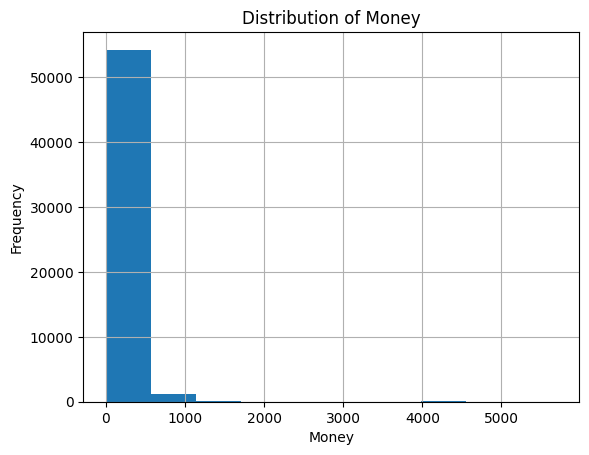

In [9]:
import matplotlib.pyplot as plt

# Create a histogram for the 'money' column
data['money'].hist()
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.title('Distribution of Money')
plt.show()


               money     ticks  peopleWin  peopleLost    outpay
money       1.000000 -0.002212   0.241389    0.761514  0.257907
ticks      -0.002212  1.000000   0.029788   -0.018693 -0.000958
peopleWin   0.241389  0.029788   1.000000   -0.160350  0.528232
peopleLost  0.761514 -0.018693  -0.160350    1.000000  0.004665
outpay      0.257907 -0.000958   0.528232    0.004665  1.000000


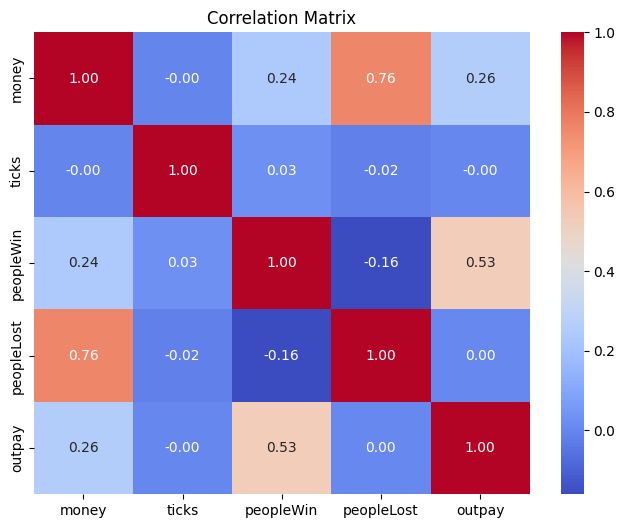

In [10]:
# Calculate and display the correlation matrix
correlation_matrix = data[['money', 'ticks', 'peopleWin', 'peopleLost', 'outpay']].corr()
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


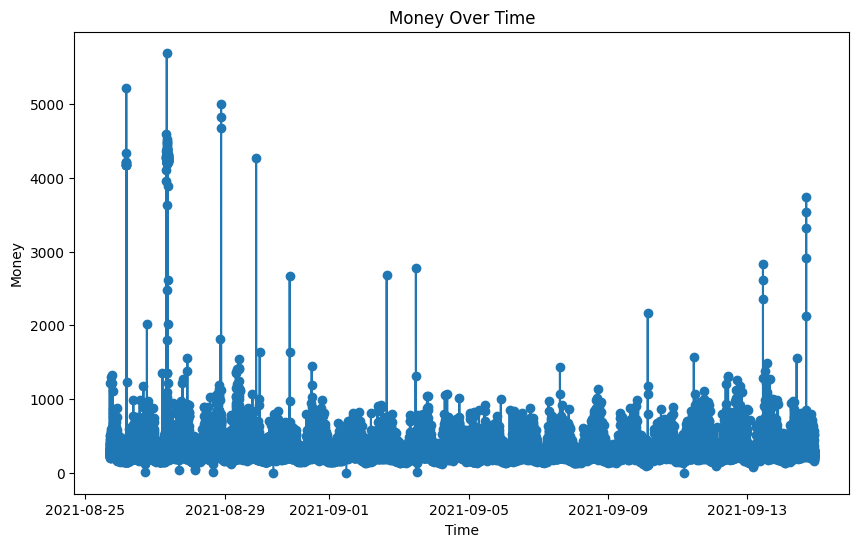

In [11]:
# Convert 'time' column to datetime format if it's not already
data['time'] = pd.to_datetime(data['time'], errors='coerce')

# Plot money over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['money'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Money')
plt.title('Money Over Time')
plt.show()


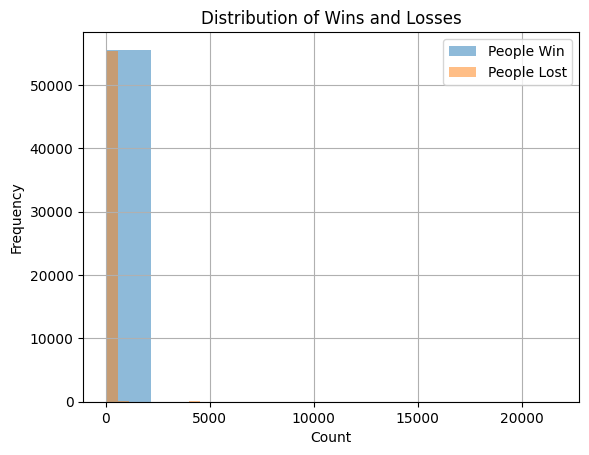

In [12]:
# Histogram for peopleWin
data['peopleWin'].hist(alpha=0.5, label='People Win')

# Histogram for peopleLost
data['peopleLost'].hist(alpha=0.5, label='People Lost')

plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Wins and Losses')
plt.show()


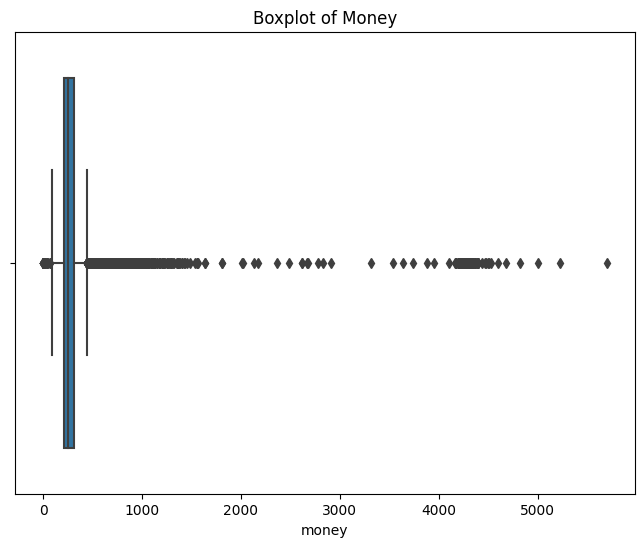

In [13]:
# Boxplot for 'money'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['money'])
plt.title('Boxplot of Money')
plt.show()


             money   peopleWin  peopleLost
gamers                                    
0         0.000000    0.000000    0.000000
3         7.500000    1.710000    0.000000
7        15.460000   15.039999    0.000000
8         4.820000    1.810000    0.250000
9        15.869999    7.870001    0.000000
...            ...         ...         ...
408     566.950260  155.670060   63.449997
420     434.350200  100.700020   80.250015
430     709.930240   41.449966  452.339900
441     540.369900  169.510100   88.150010
491     449.599820    0.999999  393.689760

[275 rows x 3 columns]


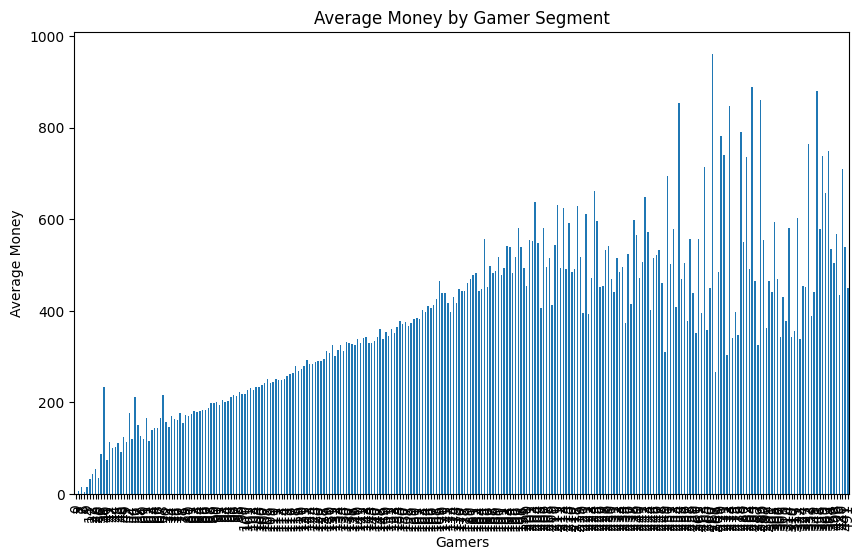

In [14]:
# Group by 'gamers' to see the average money and wins
gamers_group = data.groupby('gamers')[['money', 'peopleWin', 'peopleLost']].mean()
print(gamers_group)

# Plot the average money by gamers
gamers_group['money'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gamers')
plt.ylabel('Average Money')
plt.title('Average Money by Gamer Segment')
plt.show()


    peopleWin  peopleLost  win_loss_ratio
0  125.459984        0.25      100.367987
1    5.810003      177.04        0.032633
2  125.010000        5.96       17.961207
3    6.900001      181.85        0.037736
4    0.000000      304.88        0.000000


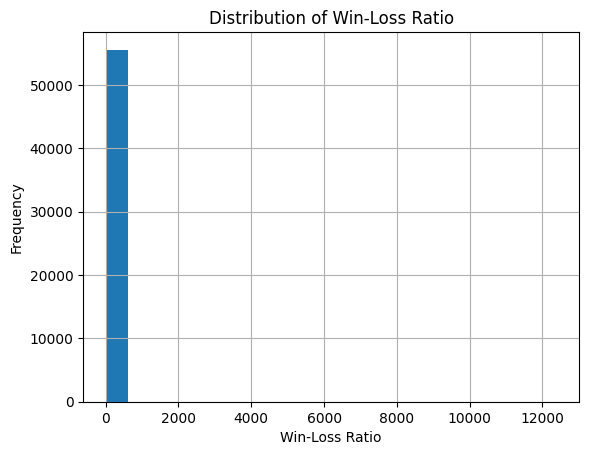

In [15]:
# Calculate win-loss ratio
data['win_loss_ratio'] = data['peopleWin'] / (data['peopleLost'] + 1)  # Add 1 to avoid division by zero
print(data[['peopleWin', 'peopleLost', 'win_loss_ratio']].head())

# Plot histogram of win-loss ratios
data['win_loss_ratio'].hist(bins=20)
plt.xlabel('Win-Loss Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Win-Loss Ratio')
plt.show()


moderator
False    271.066364
True     784.453827
Name: outpay, dtype: float64


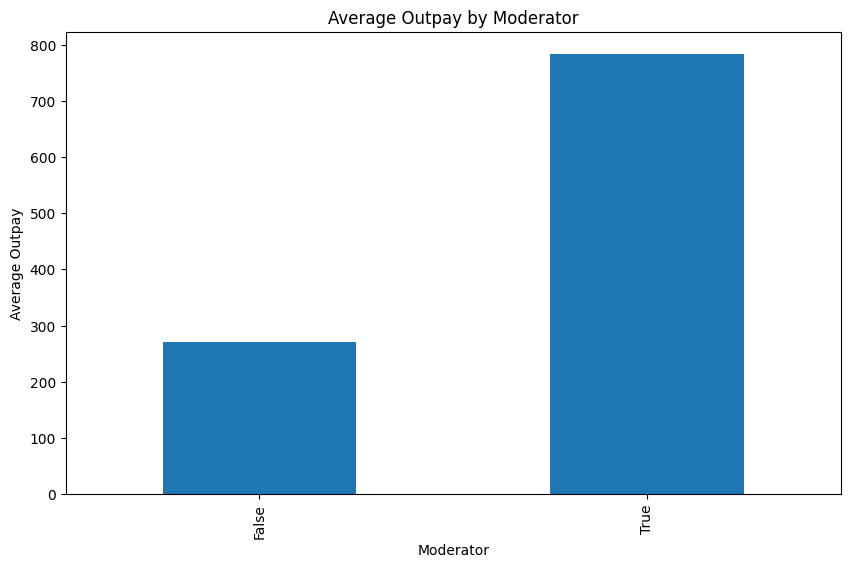

In [16]:
# Average outpay by moderator
moderator_outpay = data.groupby('moderator')['outpay'].mean()
print(moderator_outpay)

# Bar plot for average outpay by moderator
moderator_outpay.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Moderator')
plt.ylabel('Average Outpay')
plt.title('Average Outpay by Moderator')
plt.show()


    money  ticks  money_per_tick
0  283.57  14.30       18.533987
1  279.30   1.14      130.514019
2  282.87   3.91       57.610998
3  271.44   1.15      126.251163
4  304.88   1.00      152.440000


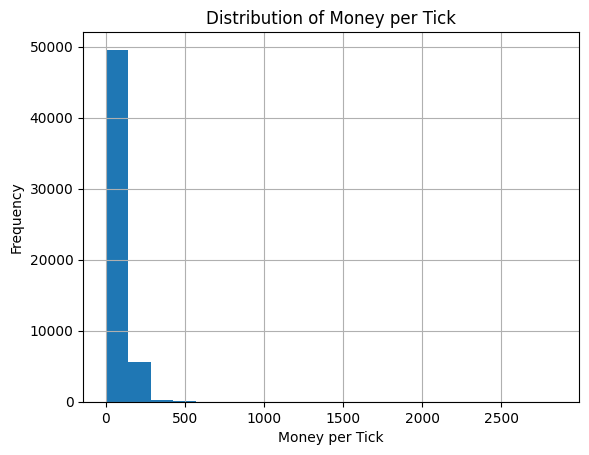

In [17]:
# Calculate money per tick
data['money_per_tick'] = data['money'] / (data['ticks'] + 1)  # Avoid division by zero
print(data[['money', 'ticks', 'money_per_tick']].head())

# Histogram for money per tick
data['money_per_tick'].hist(bins=20)
plt.xlabel('Money per Tick')
plt.ylabel('Frequency')
plt.title('Distribution of Money per Tick')
plt.show()


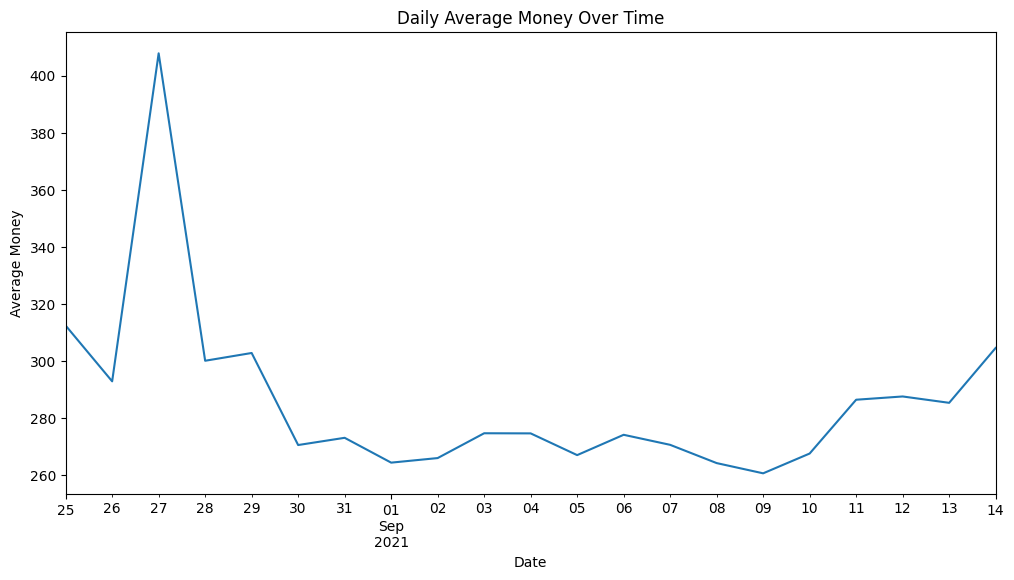

In [18]:
# Resample data by day and calculate daily averages
data.set_index('time', inplace=True)
daily_data = data.resample('D').mean()

# Plot daily average money over time
daily_data['money'].plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Average Money')
plt.title('Daily Average Money Over Time')
plt.show()


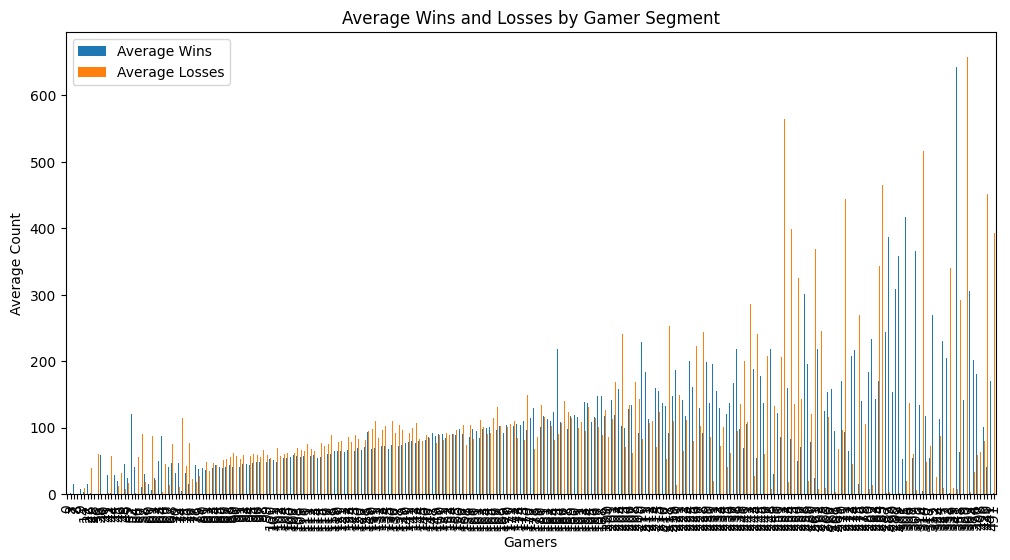

In [19]:
# Group by 'gamers' to compare average wins and losses
win_loss_by_gamers = data.groupby('gamers')[['peopleWin', 'peopleLost']].mean()
win_loss_by_gamers.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Gamers')
plt.ylabel('Average Count')
plt.title('Average Wins and Losses by Gamer Segment')
plt.legend(['Average Wins', 'Average Losses'])
plt.show()


                     gamers   peopleWin  peopleLost  win_probability
time                                                                
2021-08-25 16:43:00     144  125.459984        0.25         0.998011
2021-08-25 16:44:00     134    5.810003      177.04         0.031775
2021-08-25 16:44:00     139  125.010000        5.96         0.954493
2021-08-25 16:45:00     139    6.900001      181.85         0.036556
2021-08-25 16:45:00     142    0.000000      304.88         0.000000


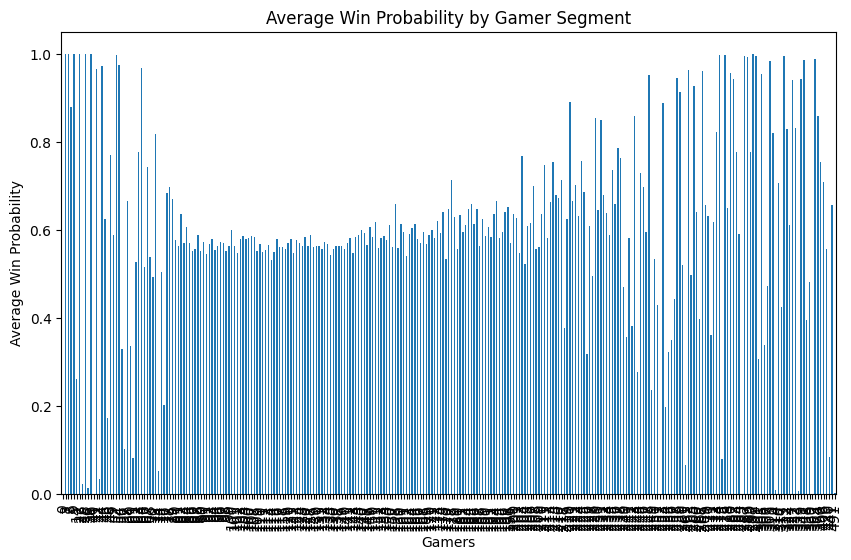

In [20]:
# Calculate winning probability for each gamer
data['win_probability'] = data['peopleWin'] / (data['peopleWin'] + data['peopleLost'])
print(data[['gamers', 'peopleWin', 'peopleLost', 'win_probability']].head())

# Average winning probability per gamer
avg_win_prob_by_gamer = data.groupby('gamers')['win_probability'].mean()
avg_win_prob_by_gamer.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gamers')
plt.ylabel('Average Win Probability')
plt.title('Average Win Probability by Gamer Segment')
plt.show()


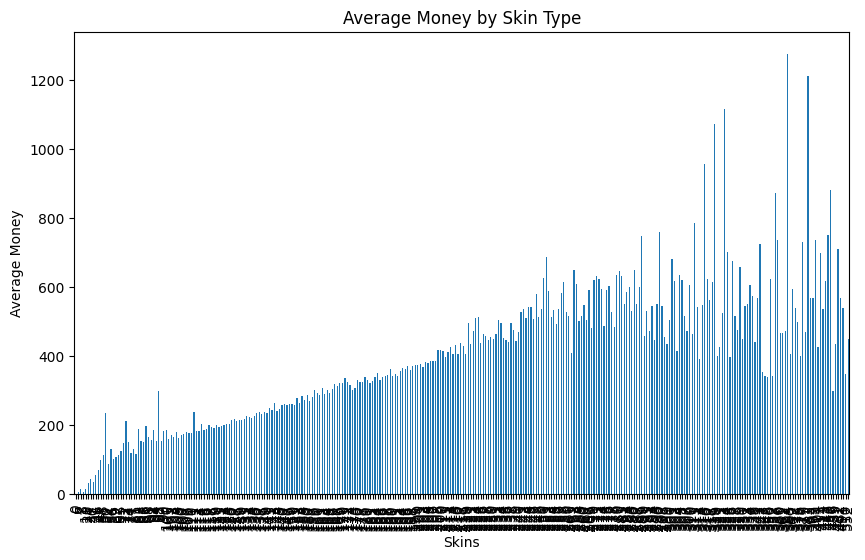

In [21]:
# Average money by skins
money_by_skins = data.groupby('skins')['money'].mean()
money_by_skins.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Skins')
plt.ylabel('Average Money')
plt.title('Average Money by Skin Type')
plt.show()


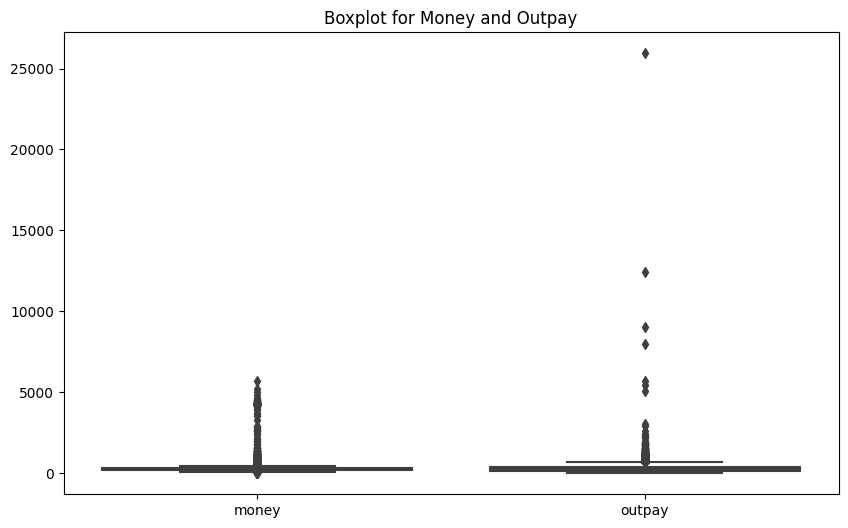

In [22]:
# Boxplot to detect outliers in 'money' and 'outpay'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['money', 'outpay']])
plt.title('Boxplot for Money and Outpay')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


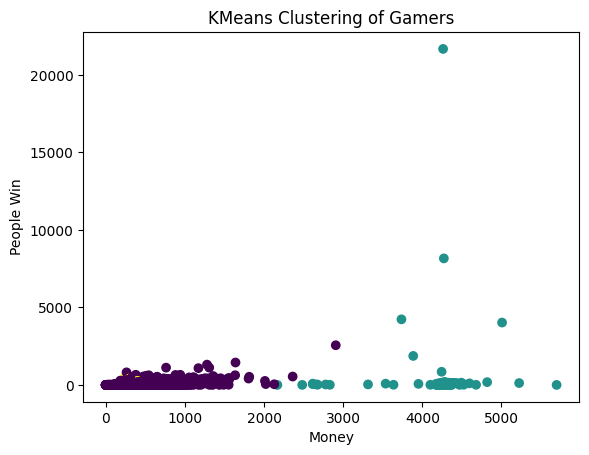

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = data[['money', 'ticks', 'peopleWin', 'peopleLost']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.scatter(data['money'], data['peopleWin'], c=data['cluster'], cmap='viridis')
plt.xlabel('Money')
plt.ylabel('People Win')
plt.title('KMeans Clustering of Gamers')
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Predict 'money' using other columns
X = data[['ticks', 'peopleWin', 'peopleLost', 'outpay']]
y = data['money']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 65176.11933946811


In [25]:
# Adding engineered features
data['win_loss_ratio'] = data['peopleWin'] / (data['peopleLost'] + 1)
data['money_per_tick'] = data['money'] / (data['ticks'] + 1)
X = data[['ticks', 'peopleWin', 'peopleLost', 'outpay', 'win_loss_ratio', 'money_per_tick']]


In [26]:
# Correlation check
print(data[['money', 'ticks', 'peopleWin', 'peopleLost', 'outpay', 'win_loss_ratio', 'money_per_tick']].corr())


                   money     ticks  peopleWin  peopleLost    outpay  \
money           1.000000 -0.002212   0.241389    0.761514  0.257907   
ticks          -0.002212  1.000000   0.029788   -0.018693 -0.000958   
peopleWin       0.241389  0.029788   1.000000   -0.160350  0.528232   
peopleLost      0.761514 -0.018693  -0.160350    1.000000  0.004665   
outpay          0.257907 -0.000958   0.528232    0.004665  1.000000   
win_loss_ratio  0.135384  0.065531   0.889299   -0.135646  0.407119   
money_per_tick  0.792872 -0.045940  -0.093639    0.848220  0.113790   

                win_loss_ratio  money_per_tick  
money                 0.135384        0.792872  
ticks                 0.065531       -0.045940  
peopleWin             0.889299       -0.093639  
peopleLost           -0.135646        0.848220  
outpay                0.407119        0.113790  
win_loss_ratio        1.000000       -0.200281  
money_per_tick       -0.200281        1.000000  


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
model_rf = RandomForestRegressor(random_state=0)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')


Random Forest MSE: 1923.9039372591428


In [28]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated MSE: {-cv_scores.mean()}')


Cross-Validated MSE: 18811.549139669376


In [29]:
from sklearn.model_selection import GridSearchCV

# Parameter tuning for Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best MSE from Grid Search: {-grid_search.best_score_}')


Best parameters: {'max_depth': 20, 'n_estimators': 200}
Best MSE from Grid Search: 2389.3018258382426
